### DEEP LEARNING MODEL
### Convulutional Neural Network
### Goal : To identify and clasify images

#### Link to the Data
#### The CIFAR-10 dataset is a widely used benchmark dataset for image classification tasks. It consists of:
#### 60,000 32x32 color images across 10 categories.
#### 50,000 training images and 10,000 test images.

C:\Users\baron\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 97ms/step - accuracy: 0.3164 - loss: 1.8601 - val_accuracy: 0.4997 - val_loss: 1.4197
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.5272 - loss: 1.3148 - val_accuracy: 0.5645 - val_loss: 1.2207
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 106ms/step - accuracy: 0.6005 - loss: 1.1244 - val_accuracy: 0.6311 - val_loss: 1.0545
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.6410 - loss: 1.0118 - val_accuracy: 0.6537 - val_loss: 0.9995
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.6764 - loss: 0.9326 - val_accuracy: 0.6729 - val_loss: 0.9345
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7022 - loss: 0.8472 - val_accuracy: 0.6823 - val_loss: 0.9175
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.7187 - loss: 0.7996 - val_accuracy: 0.6742 - val_loss: 0.9248
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.7417 - loss: 0.7470

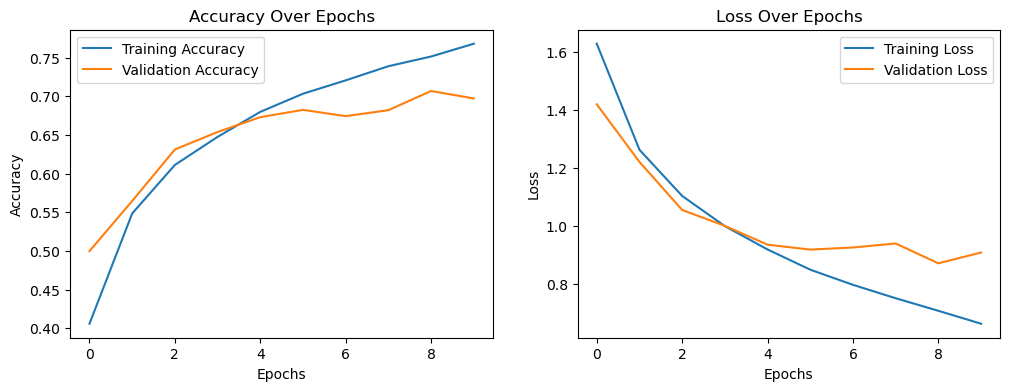

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


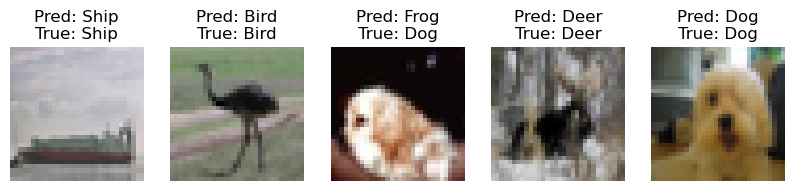

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the CIFAR-10 dataset
def load_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Convert labels to one-hot encoding
    train_labels = tf.keras.utils.to_categorical(train_labels, 10)
    test_labels = tf.keras.utils.to_categorical(test_labels, 10)
    
    return train_images, train_labels, test_images, test_labels

# Step 2: Build the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Step 3: Compile and train the CNN
def train_model(model, train_images, train_labels):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_split=0.2, batch_size=64)
    return history

# Step 4: Evaluate the model
def evaluate_model(model, test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

# Step 5: Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Step 6: Test on new data
def predict_new_data(model, test_images, test_labels, class_names):
    num_images = 5
    indices = np.random.choice(len(test_images), num_images, replace=False)
    sample_images = test_images[indices]
    sample_labels = test_labels[indices]

    predictions = model.predict(sample_images)

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_images[i])
        pred_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(sample_labels[i])]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

# Main workflow
if __name__ == "__main__":
    # Load data
    train_images, train_labels, test_images, test_labels = load_data()

    # Class names in CIFAR-10 dataset
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    # Create and train CNN
    cnn_model = create_cnn_model()
    history = train_model(cnn_model, train_images, train_labels)

    # Evaluate model
    evaluate_model(cnn_model, test_images, test_labels)

    # Visualize training history
    plot_training_history(history)

    # Test on new data
    predict_new_data(cnn_model, test_images, test_labels, class_names)
